In [1]:
pip install nltk==3.4

     |████████████████████████████████| 1.4MB 6.5MB/s 
  Created wheel for nltk: filename=nltk-3.4-cp37-none-any.whl size=1436384 sha256=4bea136ab09687f74517c5f6469998c3cd6ee40ccd6b48a3ac4cb89fde235dc3
  Stored in directory: /root/.cache/pip/wheels/4b/c8/24/b2343664bcceb7147efeb21c0b23703a05b23fcfeaceaa2a1e
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df_depression_unigram=pd.read_csv('https://raw.githubusercontent.com/lazy-af-7/Sentiment_Analysis_Depression/master/Detecting%20depression/depression/depressive_unigram_tweets.csv')
df_depression_unigram.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [4]:
df_hopeless_tweets=pd.read_csv('https://raw.githubusercontent.com/lazy-af-7/Sentiment_Analysis_Depression/master/Detecting%20depression/hopeless/tweets.csv',error_bad_lines=False)
df_hopeless_tweets.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,user_rt_id,near,geo
0,1151526536471728134,1151526536471728134,1563380295000,2019-07-17,09:18:15,PDT,1070085811650117633,greesybot,greesybot,NaN,"Hopeless, crazed, and dispossessed, I walked o...",[],[],[],0,0,0,[],[],https://twitter.com/greesybot/status/115152653...,NaN,NaN,0,NaN,NaN,NaN
1,1151526442922139649,1151524002457882624,1563380272000,2019-07-17,09:17:52,PDT,853583752483807232,umutsuz_vakayim,Hopeless,NaN,KAP haberini beklerken serSERİn olmuştuk,['galatasaraysk'],[],[],0,0,0,[],[],https://twitter.com/umutsuz_vakayim/status/115...,NaN,NaN,0,NaN,NaN,NaN
2,1151526396210110464,1151526396210110464,1563380261000,2019-07-17,09:17:41,PDT,1120246244075626496,hopeless95,𐂂,NaN,17-july-2019. 🦉💛.,[],[],[],0,0,1,[],[],https://twitter.com/hopeless95/status/11515263...,NaN,NaN,0,NaN,NaN,NaN
3,1151526283890683904,1151525753990725632,1563380235000,2019-07-17,09:17:15,PDT,1147135129489301505,hopehopexx,Hopeless,NaN,เป็นไรสาวน้อย,['nupsibb'],[],[],1,0,0,[],[],https://twitter.com/Hopehopexx/status/11515262...,NaN,NaN,0,NaN,NaN,NaN
4,1151526267738628097,1151526267738628097,1563380231000,2019-07-17,09:17:11,PDT,1120246244075626496,hopeless95,𐂂,NaN,انا قاعده اعيش اسعد ايام حياتي💛.,[],[],[],0,0,1,[],[],https://twitter.com/hopeless95/status/11515262...,NaN,NaN,0,NaN,NaN,NaN


In [5]:
df_hopeless_tweets.drop(['date', 'timezone', 'username', 'name', 'conversation_id', 'created_at', 'user_id', 'place', 'likes_count', 'link', 'retweet', 'quote_url', 'video', 'user_rt_id', 'near', 'geo', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count'], axis = 1, inplace = True)
df_hopeless_tweets.head()

,id,time,tweet,hashtags,cashtags
0,1151526536471728134,09:18:15,"Hopeless, crazed, and dispossessed, I walked o...",[],[]
1,1151526442922139649,09:17:52,KAP haberini beklerken serSERİn olmuştuk,[],[]
2,1151526396210110464,09:17:41,17-july-2019. 🦉💛.,[],[]
3,1151526283890683904,09:17:15,เป็นไรสาวน้อย,[],[]
4,1151526267738628097,09:17:11,انا قاعده اعيش اسعد ايام حياتي💛.,[],[]


In [6]:
lonely_tweets_df=pd.read_csv('https://raw.githubusercontent.com/lazy-af-7/Sentiment_Analysis_Depression/master/Detecting%20depression/lonely/tweets.csv')
lonely_tweets_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,user_rt_id,near,geo
0,1152982582843326466,1152982582843326466,1563727443000,2019-07-21,09:44:03,PDT,1151002890573701120,monbebe93,제시카,NaN,i dont know why but he looks so lonely in this...,[],['https://twitter.com/OI_IO999/status/11529787...,[],0,0,0,[],[],https://twitter.com/monbebe93/status/115298258...,NaN,https://twitter.com/OI_IO999/status/1152978766...,0,NaN,NaN,NaN
1,1152982578741284865,1152916420587675648,1563727442000,2019-07-21,09:44:02,PDT,1065697539259854849,sugarplum_skz,lonely wolf,NaN,Я после того как увидела их начала отращивать ...,['dddddnrlv'],[],[],0,0,0,[],[],https://twitter.com/sugarplum_skz/status/11529...,NaN,NaN,0,NaN,NaN,NaN
2,1152982577181024259,1152976191781048322,1563727442000,2019-07-21,09:44:02,PDT,704212959950667776,lonely_walsh,Elizabeth,NaN,Even follow you on all social networks,['kanyedre'],[],[],0,0,0,[],[],https://twitter.com/lonely_walsh/status/115298...,NaN,NaN,0,NaN,NaN,NaN
3,1152982576153239552,1152982576153239552,1563727442000,2019-07-21,09:44:02,PDT,284959188,lonelyoakradio,Lonely Oak radio,NaN,"#Nowplaying: Garmonsway, Gibbon and Harrington...",['bestroomsongs'],[],[],0,0,0,['#nowplaying'],[],https://twitter.com/LonelyOakRadio/status/1152...,NaN,NaN,0,NaN,NaN,NaN
4,1152982566263296000,1152982566263296000,1563727439000,2019-07-21,09:43:59,PDT,144328187,noelle_amor,YaYa🌹,NaN,Laying in this hammock every Sunday alone is g...,[],[],[],0,0,0,[],[],https://twitter.com/Noelle_Amor/status/1152982...,NaN,NaN,0,NaN,NaN,NaN


In [7]:
lonely_tweets_df.drop(['date', 'timezone', 'username', 'name', 'conversation_id', 'created_at', 'user_id', 'place', 'likes_count', 'link', 'retweet', 'quote_url', 'video', 'user_rt_id', 'near', 'geo', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count'], axis = 1, inplace = True)
lonely_tweets_df.head()

,id,time,tweet,hashtags,cashtags
0,1152982582843326466,09:44:03,i dont know why but he looks so lonely in this...,[],[]
1,1152982578741284865,09:44:02,Я после того как увидела их начала отращивать ...,[],[]
2,1152982577181024259,09:44:02,Even follow you on all social networks,[],[]
3,1152982576153239552,09:44:02,"#Nowplaying: Garmonsway, Gibbon and Harrington...",['#nowplaying'],[]
4,1152982566263296000,09:43:59,Laying in this hammock every Sunday alone is g...,[],[]


In [8]:
antidepressant_tweets_df=pd.read_csv('https://raw.githubusercontent.com/lazy-af-7/Sentiment_Analysis_Depression/master/Detecting%20depression/antidepressants/tweets.csv')
antidepressant_tweets_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,user_rt_id,near,geo
0,1152995178359218176,1152995178359218176,1563730446000,2019-07-21,10:34:06,PDT,1134809541818929152,neumnelo,🍓⚢,NaN,i can't think logically and all of shit i say ...,[],[],[],0,0,0,[],[],https://twitter.com/neumnelo/status/1152995178...,NaN,NaN,0,NaN,NaN,NaN
1,1152994945537576960,1152994945537576960,1563730391000,2019-07-21,10:33:11,PDT,709759485162598400,csevern5,C Severn,NaN,Recently moved to Australia and was ASTOUNDED ...,[],['https://ift.tt/2XWUTri'],[],0,0,0,[],[],https://twitter.com/csevern5/status/1152994945...,NaN,NaN,0,NaN,NaN,NaN
2,1152994834359209985,1152994145700634625,1563730364000,2019-07-21,10:32:44,PDT,969718541703368704,healingapriori,A Kid That Knows Nothing,NaN,Maybe I should go back on my antidepressants. ...,[],[],[],0,0,0,[],[],https://twitter.com/healingapriori/status/1152...,NaN,NaN,0,NaN,NaN,NaN
3,1152994452606033920,1152994452606033920,1563730273000,2019-07-21,10:31:13,PDT,864470942159953920,liferenewedjax,Life Renewed Counseling,NaN,What It’s Like to Know You’ll Be on Antidepres...,[],['http://bit.ly/2S56YUV'],['https://pbs.twimg.com/media/EABCWBZVUAARThP....,0,0,0,[],[],https://twitter.com/liferenewedjax/status/1152...,NaN,NaN,0,NaN,NaN,NaN
4,1152994432188370949,1152994432188370949,1563730268000,2019-07-21,10:31:08,PDT,1029517541608108033,glitterfairy420,𝕵𝖊𝖓𝖓𝖎𝖋𝖊𝖗★,NaN,Do antidepressants work? :/,[],[],[],0,0,0,[],[],https://twitter.com/Glitterfairy420/status/115...,NaN,NaN,0,NaN,NaN,NaN


In [9]:
antidepressant_tweets_df.drop(['date', 'timezone', 'username', 'name', 'conversation_id', 'created_at', 'user_id', 'place', 'likes_count', 'link', 'retweet', 'quote_url', 'video', 'user_rt_id', 'near', 'geo', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count'], axis = 1, inplace = True)
antidepressant_tweets_df.head()

,id,time,tweet,hashtags,cashtags
0,1152995178359218176,10:34:06,i can't think logically and all of shit i say ...,[],[]
1,1152994945537576960,10:33:11,Recently moved to Australia and was ASTOUNDED ...,[],[]
2,1152994834359209985,10:32:44,Maybe I should go back on my antidepressants. ...,[],[]
3,1152994452606033920,10:31:13,What It’s Like to Know You’ll Be on Antidepres...,[],[]
4,1152994432188370949,10:31:08,Do antidepressants work? :/,[],[]


In [10]:
suicide_tweets_df=pd.read_csv('https://raw.githubusercontent.com/lazy-af-7/Sentiment_Analysis_Depression/master/Detecting%20depression/suicide/tweets.csv')
suicide_tweets_df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,user_rt_id,near,geo
0,1152996044604682241,1152996044604682241,1563730653000,2019-07-21,10:37:33,PDT,2958699552,imonlylj,Misunderśtøød x Mìdaś ㊗️️,NaN,Suicide Thoughts ....,[],[],[],0,0,0,[],[],https://twitter.com/ImonlyLj/status/1152996044...,NaN,NaN,0,NaN,NaN,NaN
1,1152995993148899329,1152995993148899329,1563730641000,2019-07-21,10:37:21,PDT,29907109,_kingneal,King.,NaN,If I wake up as a white person in my next life...,[],[],[],0,0,0,[],[],https://twitter.com/_kingneal/status/115299599...,NaN,NaN,0,NaN,NaN,NaN
2,1152995985053900800,1152995985053900800,1563730639000,2019-07-21,10:37:19,PDT,1152971452846694401,ventingbroken,Venting (More people are broken than it seems),NaN,I fixed my bio (Cant add a banner because Twit...,[],[],[],0,0,0,[],[],https://twitter.com/VentingBroken/status/11529...,NaN,NaN,0,NaN,NaN,NaN
3,1152995984642887683,1152995984642887683,1563730639000,2019-07-21,10:37:19,PDT,2561945708,awesome_thebest,Just me,NaN,Weaponizign Suicide disturbs me a lot Cardi B ...,[],[],[],0,0,0,[],[],https://twitter.com/awesome_thebest/status/115...,NaN,NaN,0,NaN,NaN,NaN
4,1152995955559620608,1152995955559620608,1563730632000,2019-07-21,10:37:12,PDT,891371293563596800,drmo7og,Dr.mo7og,NaN,#sam harcelé par ses camarades de classe se #s...,[],['http://www.nosignalfound.fr/harcele-le-jeune...,[],0,0,0,"['#sam', '#suicide']",[],https://twitter.com/DrMo7oG/status/11529959555...,NaN,NaN,0,NaN,NaN,NaN


In [11]:
suicide_tweets_df.drop(['date', 'timezone', 'username', 'name', 'conversation_id', 'created_at', 'user_id', 'place', 'likes_count', 'link', 'retweet', 'quote_url', 'video', 'user_rt_id', 'near', 'geo', 'mentions', 'urls', 'photos', 'replies_count', 'retweets_count'], axis = 1, inplace = True)

In [12]:
suicide_tweets_df.head()

,id,time,tweet,hashtags,cashtags
0,1152996044604682241,10:37:33,Suicide Thoughts ....,[],[]
1,1152995993148899329,10:37:21,If I wake up as a white person in my next life...,[],[]
2,1152995985053900800,10:37:19,I fixed my bio (Cant add a banner because Twit...,[],[]
3,1152995984642887683,10:37:19,Weaponizign Suicide disturbs me a lot Cardi B ...,[],[]
4,1152995955559620608,10:37:12,#sam harcelé par ses camarades de classe se #s...,"['#sam', '#suicide']",[]


In [13]:
df_row_reindex = pd.concat([df_depression_unigram, df_hopeless_tweets, lonely_tweets_df, antidepressant_tweets_df, antidepressant_tweets_df, suicide_tweets_df], ignore_index=True)

df_row_reindex

,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]
...,...,...,...,...,...,...
225179,NaN,1152367589030391809,17:00:17,えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑),[],[]
225180,NaN,1152367565483761664,17:00:12,"#PhysicianFriday ""Let's empower doctors to tak...","['#physicianfriday', '#suicide', '#physicians'...",[]
225181,NaN,1152367519283367936,17:00:01,A spike in suicides among teenage boys in the ...,"['#aztrauma', '#traumatraining', '#suicide', '...",[]
225182,NaN,1152367516083204096,17:00:00,Need some support? Check out the following res...,[],[]


In [14]:
df = df_row_reindex

In [15]:
depressive_twint_tweets_df = df_row_reindex
depressive_twint_tweets_df.head()

,Unnamed: 0,id,time,tweet,hashtags,cashtags
0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [16]:
depressive_twint_tweets_df = df.drop_duplicates()

In [17]:
depressive_twint_tweets_df
export_csv = depressive_twint_tweets_df.to_csv('depressive_unigram_tweets_final.csv')


In [18]:
df=pd.read_csv('/content/depressive_unigram_tweets_final.csv')    
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[]
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[]
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[]
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[]
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[]


In [19]:
pip install vaderSentiment


     |████████████████████████████████| 133kB 5.3MB/s 


In [20]:
import nltk
nltk.download(['punkt','stopwords'])
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [21]:
df.isnull().any()

Unnamed: 0      False
Unnamed: 0.1     True
id               True
time             True
tweet            True
hashtags         True
cashtags         True
dtype: bool

In [22]:
df.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2783576 entries, 0 to 2783575
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Unnamed: 0    2783576 non-null  object
 1   Unnamed: 0.1  135509 non-null   object
 2   id            1650624 non-null  object
 3   time          1650612 non-null  object
 4   tweet         1650599 non-null  object
 5   hashtags      224225 non-null   object
 6   cashtags      224225 non-null   object
dtypes: object(7)
memory usage: 148.7+ MB


In [23]:
df_new=df[df['tweet'].notnull()]
df_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1650599 entries, 0 to 2783575
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   Unnamed: 0    1650599 non-null  object
 1   Unnamed: 0.1  135474 non-null   object
 2   id            1650599 non-null  object
 3   time          1650599 non-null  object
 4   tweet         1650599 non-null  object
 5   hashtags      224225 non-null   object
 6   cashtags      224225 non-null   object
dtypes: object(7)
memory usage: 100.7+ MB


In [24]:
df_new['clean_tweet'] = df_new['tweet'].apply(lambda x: ' '.join([item for item in x.split() if item not in stopwords]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,id,time,tweet,hashtags,cashtags,clean_tweet
0,0,0,1.15135E+18,21:25:13,"Wow, my dad yday: “you don’t take those stupid...",[],[],"Wow, dad yday: “you don’t take stupid depressi..."
1,1,1,1.15135E+18,21:25:07,what part of this was really harmfult of a lot...,[],[],part really harmfult lot people went every gui...
2,2,2,1.15135E+18,21:25:06,one of the ways I got through my #depression i...,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...
3,3,3,1.15135E+18,21:24:55,see i wanna do one of them but they all say th...,[],[],"see wanna one say PTSD, depression, and/or anx..."
4,4,4,1.15135E+18,21:24:51,IS IT clinical depression or is it the palpabl...,[],[],IS IT clinical depression palpable hopelessnes...


In [26]:
df_new.drop('tweet',axis=1,inplace=True)
df_new.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Unnamed: 0,Unnamed: 0.1,id,time,hashtags,cashtags,clean_tweet
0,0,0,1.15135E+18,21:25:13,[],[],"Wow, dad yday: “you don’t take stupid depressi..."
1,1,1,1.15135E+18,21:25:07,[],[],part really harmfult lot people went every gui...
2,2,2,1.15135E+18,21:25:06,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...
3,3,3,1.15135E+18,21:24:55,[],[],"see wanna one say PTSD, depression, and/or anx..."
4,4,4,1.15135E+18,21:24:51,[],[],IS IT clinical depression palpable hopelessnes...


In [27]:
df_new['vader_score'] = df_new['clean_tweet'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df_new.head()

,Unnamed: 0,Unnamed: 0.1,id,time,hashtags,cashtags,clean_tweet,vader_score
0,0,0,1.15135E+18,21:25:13,[],[],"Wow, dad yday: “you don’t take stupid depressi...",-0.4122
1,1,1,1.15135E+18,21:25:07,[],[],part really harmfult lot people went every gui...,-0.8074
2,2,2,1.15135E+18,21:25:06,"['#depression', '#uncoveringthenewu', '#change...",[],one ways I got #depression learning dance rain...,0.3382
3,3,3,1.15135E+18,21:24:55,[],[],"see wanna one say PTSD, depression, and/or anx...",-0.4588
4,4,4,1.15135E+18,21:24:51,[],[],IS IT clinical depression palpable hopelessnes...,-0.8316


In [29]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
negative_num = len(df_new[df_new['vader_score']<0.05])
df_new['vader_sentiment_label']= df_new['vader_score'].map(lambda x:int(1) if x>=0.05 else int(0))
df_new.drop(['Unnamed: 0.1', 'id', 'time', ], axis = 1, inplace = True)
df_new = df_new[['Unnamed: 0', 'vader_sentiment_label', 'vader_score', 'clean_tweet']]
df_new.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Unnamed: 0,vader_sentiment_label,vader_score,clean_tweet
0,0,0,-0.4122,"Wow, dad yday: “you don’t take stupid depressi..."
1,1,0,-0.8074,part really harmfult lot people went every gui...
2,2,1,0.3382,one ways I got #depression learning dance rain...
3,3,0,-0.4588,"see wanna one say PTSD, depression, and/or anx..."
4,4,0,-0.8316,IS IT clinical depression palpable hopelessnes...


In [30]:
positive_num = len(df_new[df_new['vader_score'] >=0.05])
neutral_num = len(df_new[(df_new['vader_score'] >-0.05) & (df_new['vader_score']<0.05)])
negative_num = len(df_new[df_new['vader_score']<=-0.05])
positive_num,neutral_num, negative_num

(49444, 1485206, 115949)

In [31]:
df_new.to_csv('vader_processed_final.csv')

In [32]:
df_new['text'] = df_new['clean_tweet']

In [33]:
df_new['text']

0          Wow, dad yday: “you don’t take stupid depressi...
1          part really harmfult lot people went every gui...
2          one ways I got #depression learning dance rain...
3          see wanna one say PTSD, depression, and/or anx...
4          IS IT clinical depression palpable hopelessnes...
                                 ...                        
2783571                     えっ？！オニィ結構なお歳……（今知った） 変な声でちゃった(笑)
2783572    #PhysicianFriday "Let's empower doctors take t...
2783573    A spike suicides among teenage boys United Sta...
2783574    Need support? Check following resources: Couns...
2783575    You improve quality life friend need. Learn Me...
Name: text, Length: 1650599, dtype: object

In [34]:
import re
from nltk.corpus import stopwords
def remove_url(txt):
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [35]:
all_tweets_no_urls = [remove_url(tweet) for tweet in df_new['text']]
all_tweets_no_urls[:5]

['Wow dad yday you dont take stupid depression drugs anymore though you Because theyre absolute worst thing and never need them Aint great family supportive My moms sisters stance similar btw',
 'part really harmfult lot people went every guideline understand 13rw horror show supposed insight depression mental illness overall helpful public narrative topic',
 'one ways I got depression learning dance rain It source strength stronger circumstances UncoveringthenewU ChangeYourMindChangeYourCircumstances pictwittercom3vxKuQ0DvD',
 'see wanna one say PTSD depression andor anxiety play LIKEE',
 'IS IT clinical depression palpable hopelessness generation']

In [36]:
sentences = df_new['text']

In [37]:
all_tweets_no_urls[0].split()

['Wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'Because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'Aint',
 'great',
 'family',
 'supportive',
 'My',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [38]:
all_tweets_no_urls[0].lower().split()

['wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'aint',
 'great',
 'family',
 'supportive',
 'my',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [39]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_no_urls]
words_in_tweet[:2]

[['wow',
  'dad',
  'yday',
  'you',
  'dont',
  'take',
  'stupid',
  'depression',
  'drugs',
  'anymore',
  'though',
  'you',
  'because',
  'theyre',
  'absolute',
  'worst',
  'thing',
  'and',
  'never',
  'need',
  'them',
  'aint',
  'great',
  'family',
  'supportive',
  'my',
  'moms',
  'sisters',
  'stance',
  'similar',
  'btw'],
 ['part',
  'really',
  'harmfult',
  'lot',
  'people',
  'went',
  'every',
  'guideline',
  'understand',
  '13rw',
  'horror',
  'show',
  'supposed',
  'insight',
  'depression',
  'mental',
  'illness',
  'overall',
  'helpful',
  'public',
  'narrative',
  'topic']]

In [40]:
import itertools
import collections
all_words_no_urls = list(itertools.chain(*words_in_tweet))
counts_no_urls = collections.Counter(all_words_no_urls)
counts_no_urls.most_common(15)

[('i', 65848),
 ('lonely', 55378),
 ('smile', 42634),
 ('wide', 42271),
 ('suicide', 39566),
 ('im', 29153),
 ('depression', 26013),
 ('like', 14866),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11236),
 ('the', 10641),
 ('you', 10512),
 ('feel', 10500),
 ('its', 9617)]

In [41]:
clean_tweets_no_urls = pd.DataFrame(counts_no_urls.most_common(15),columns=['words', 'count'])
clean_tweets_no_urls.head()

,words,count
0,i,65848
1,lonely,55378
2,smile,42634
3,wide,42271
4,suicide,39566


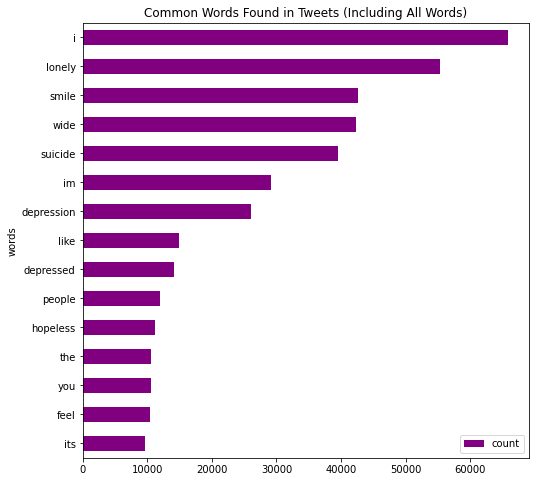

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets_no_urls.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()

In [43]:
stop_words = set(stopwords.words('english'))
list(stop_words)[0:10]

['been', 'hers', 'these', 'yours', 'and', 'at', 'hasn', 'my', 'but', 'into']

In [44]:
words_in_tweet[0]

['wow',
 'dad',
 'yday',
 'you',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'you',
 'because',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'and',
 'never',
 'need',
 'them',
 'aint',
 'great',
 'family',
 'supportive',
 'my',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [45]:
tweets_nsw = [[word for word in tweet_words if not word in stop_words]for tweet_words in words_in_tweet]
tweets_nsw[0]

['wow',
 'dad',
 'yday',
 'dont',
 'take',
 'stupid',
 'depression',
 'drugs',
 'anymore',
 'though',
 'theyre',
 'absolute',
 'worst',
 'thing',
 'never',
 'need',
 'aint',
 'great',
 'family',
 'supportive',
 'moms',
 'sisters',
 'stance',
 'similar',
 'btw']

In [46]:
all_words_nsw = list(itertools.chain(*tweets_nsw))
counts_nsw = collections.Counter(all_words_nsw)
counts_nsw.most_common(15)

[('lonely', 55378),
 ('smile', 42634),
 ('wide', 42271),
 ('suicide', 39566),
 ('im', 29153),
 ('depression', 26013),
 ('like', 14866),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11236),
 ('feel', 10500),
 ('get', 8998),
 ('one', 8971),
 ('de', 8204),
 ('know', 8041)]

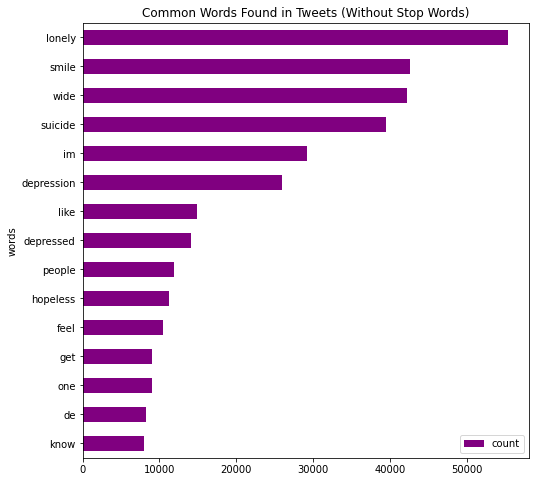

In [47]:
clean_tweets_nsw = pd.DataFrame(counts_nsw.most_common(15),columns=['words', 'count'])
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets_nsw.sort_values(by='count').plot.barh(x='words',y='count',ax=ax,color="purple")
ax.set_title("Common Words Found in Tweets (Without Stop Words)")
plt.show()

In [48]:
collection_words = ['im', 'de', 'like', 'one']
tweets_nsw_nc = [[w for w in word if not w in collection_words]for word in tweets_nsw]

In [49]:
all_words_nsw_nc = list(itertools.chain(*tweets_nsw_nc))
counts_nsw_nc = collections.Counter(all_words_nsw_nc)
counts_nsw_nc.most_common(15)

[('lonely', 55378),
 ('smile', 42634),
 ('wide', 42271),
 ('suicide', 39566),
 ('depression', 26013),
 ('depressed', 14064),
 ('people', 11913),
 ('hopeless', 11236),
 ('feel', 10500),
 ('get', 8998),
 ('know', 8041),
 ('dont', 7855),
 ('time', 7433),
 ('life', 6812),
 ('love', 6585)]

In [50]:
len(counts_nsw_nc)

125585

In [51]:
clean_tweets_ncw = pd.DataFrame(counts_nsw_nc.most_common(15),columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,lonely,55378
1,smile,42634
2,wide,42271
3,suicide,39566
4,depression,26013


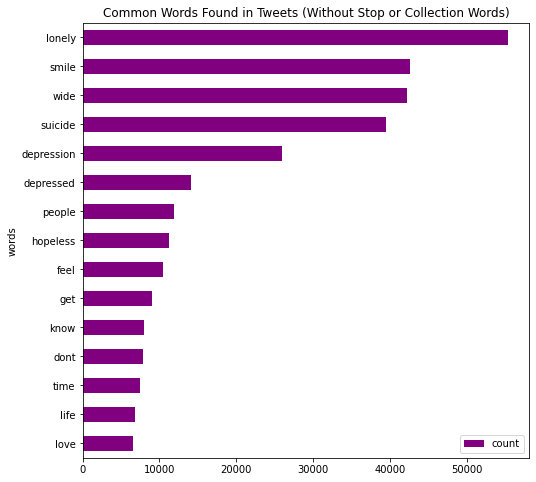

In [52]:
fig, ax = plt.subplots(figsize=(8, 8))
clean_tweets_ncw.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Without Stop or Collection Words)")

plt.show()

In [53]:
import nltk
from nltk import bigrams
import networkx as nx
terms_bigram = [list(bigrams(tweet)) for tweet in tweets_nsw_nc]
terms_bigram[0]

[('wow', 'dad'),
 ('dad', 'yday'),
 ('yday', 'dont'),
 ('dont', 'take'),
 ('take', 'stupid'),
 ('stupid', 'depression'),
 ('depression', 'drugs'),
 ('drugs', 'anymore'),
 ('anymore', 'though'),
 ('though', 'theyre'),
 ('theyre', 'absolute'),
 ('absolute', 'worst'),
 ('worst', 'thing'),
 ('thing', 'never'),
 ('never', 'need'),
 ('need', 'aint'),
 ('aint', 'great'),
 ('great', 'family'),
 ('family', 'supportive'),
 ('supportive', 'moms'),
 ('moms', 'sisters'),
 ('sisters', 'stance'),
 ('stance', 'similar'),
 ('similar', 'btw')]

In [54]:
bigrams = list(itertools.chain(*terms_bigram))
bigram_counts = collections.Counter(bigrams)
bigram_counts.most_common(20)

[(('smile', 'wide'), 42185),
 (('afraid', 'loneliness'), 4641),
 (('feel', 'lonely'), 3541),
 (('suicide', 'squad'), 2769),
 (('commit', 'suicide'), 2624),
 (('committed', 'suicide'), 1685),
 (('feeling', 'lonely'), 1645),
 (('mental', 'health'), 1398),
 (('hopeless', 'romantic'), 1347),
 (('anxiety', 'depression'), 1337),
 (('suicide', 'bomber'), 1320),
 (('depression', 'anxiety'), 1278),
 (('sad', 'lonely'), 1181),
 (('social', 'media'), 958),
 (('get', 'lonely'), 922),
 (('suicide', 'prevention'), 841),
 (('committing', 'suicide'), 838),
 (('seasonal', 'depression'), 806),
 (('female', 'suicide'), 760),
 (('dont', 'know'), 741)]

In [55]:
bigram_df = pd.DataFrame(bigram_counts.most_common(20),columns=['bigram', 'count'])
bigram_df

,bigram,count
0,"(smile, wide)",42185
1,"(afraid, loneliness)",4641
2,"(feel, lonely)",3541
3,"(suicide, squad)",2769
4,"(commit, suicide)",2624
5,"(committed, suicide)",1685
6,"(feeling, lonely)",1645
7,"(mental, health)",1398
8,"(hopeless, romantic)",1347
9,"(anxiety, depression)",1337


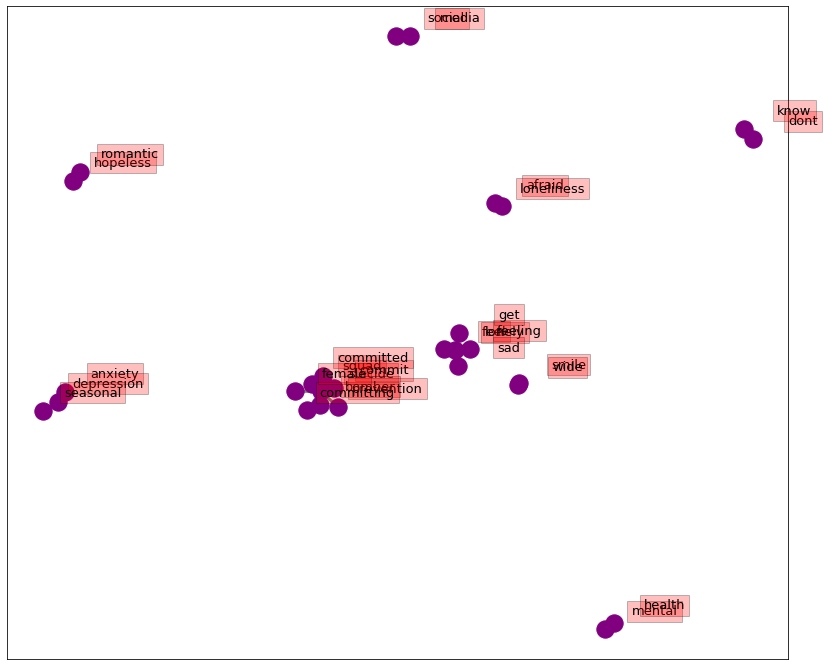

In [56]:
d = bigram_df.set_index('bigram').T.to_dict('records')
G = nx.Graph()

for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 10))

fig, ax = plt.subplots(figsize=(14, 12))

pos = nx.spring_layout(G, k=1)

nx.draw_networkx(G, pos,font_size=16,width=3,edge_color='grey',node_color='purple',with_labels = False,ax=ax)

for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.045
    ax.text(x, y,s=key,bbox=dict(facecolor='red', alpha=0.25),horizontalalignment='center', fontsize=13)
    
plt.show()

In [59]:
df=pd.read_csv('/content/drive/MyDrive/Sentiment Analysis Dataset 2.csv',error_bad_lines=False)
df.head()

b'Skipping line 8836: expected 4 fields, saw 5\n'
b'Skipping line 535882: expected 4 fields, saw 7\n'


,ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [58]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [60]:
pip install ftfy

     |████████████████████████████████| 71kB 3.7MB/s 
  Created wheel for ftfy: filename=ftfy-6.0.1-cp37-none-any.whl size=41573 sha256=16c568c595b3db14e840365cb2b91c1b2d17f6c544dc5494fafe241f366c2949
  Stored in directory: /root/.cache/pip/wheels/ae/73/c7/9056e14b04919e5c262fe80b54133b1a88d73683d05d7ac65c
Successfully built ftfy


In [61]:
pip install word2vec

     |████████████████████████████████| 51kB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for word2vec: filename=word2vec-0.11.1-cp37-none-any.whl size=156413 sha256=72517075dd5acf69e3c736b5faa606044a143c3a0655d4b9ae10861c70561ab8
  Stored in directory: /root/.cache/pip/wheels/f3/7c/ac/fcb6d867f806021c3730fd848970db988b1d0030b5d20c0e02
Successfully built word2vec


In [62]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from math import log, sqrt, exp
import pandas as pd
import numpy as np
from numpy import sign

import re
import warnings
warnings.filterwarnings("ignore")
import ftfy

from sklearn.metrics import  classification_report, confusion_matrix, accuracy_score

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

from keras import optimizers
from keras.models import Model, Sequential
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Conv1D, Dense, Input, LSTM, Embedding, Dropout, Activation, MaxPooling1D
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import gensim
import word2vec
from gensim.test.utils import common_texts
from gensim.models import Word2Vec
from gensim.test.utils import get_tmpfile
from gensim.models import KeyedVectors
from gensim.test.utils import datapath

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

import re
import numpy as np
import os
from collections import Counter
import logging
import time
import pickle
import itertools

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [63]:
DEPRES_NROWS = 25000 
RANDOM_NROWS = 20000 
MAX_SEQUENCE_LENGTH = 280 
MAX_NB_WORDS = 25000
EMBEDDING_DIM = 200
TRAIN_SPLIT = 0.6
TEST_SPLIT = 0.2
LEARNING_RATE = 0.5
EPOCHS= 20

In [64]:
DEPRESSIVE_TWEETS_CSV = '/content/vader_processed_final.csv'
EMBEDDING_FILE='/content/drive/MyDrive/Twitter NLP/glove.twitter.27B.200d.txt'
RANDOM_TWEETS_CSV='/content/drive/MyDrive/Sentiment Analysis Dataset 2.csv'

In [65]:
depressive_tweets_df = pd.read_csv(DEPRESSIVE_TWEETS_CSV, usecols = range(1,5), nrows = DEPRES_NROWS)
random_tweets_df = pd.read_csv(RANDOM_TWEETS_CSV, encoding = "ISO-8859-1", usecols = range(0,4), nrows = RANDOM_NROWS)

In [66]:
random_tweets_df.head()

,ï»¿ItemID,Sentiment,SentimentSource,SentimentText
0,1,0,Sentiment140,is so sad for my APL frie...
1,2,0,Sentiment140,I missed the New Moon trail...
2,3,1,Sentiment140,omg its already 7:30 :O
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...


In [67]:
depressive_tweets_df.head()

,Unnamed: 0.1,vader_sentiment_label,vader_score,clean_tweet
0,0,0,-0.4122,"Wow, dad yday: “you don’t take stupid depressi..."
1,1,0,-0.8074,part really harmfult lot people went every gui...
2,2,1,0.3382,one ways I got #depression learning dance rain...
3,3,0,-0.4588,"see wanna one say PTSD, depression, and/or anx..."
4,4,0,-0.8316,IS IT clinical depression palpable hopelessnes...


In [68]:
emojies = [":‑)", ":)", ":D", ":o)", ":]", ":3", ":c)", ":>", "=]", "8)", "=)", ":}", ":^)", ":っ)", ":‑D", "8‑D", "8D", "x‑D", "xD", "X‑D", "XD", "=‑D", "=D", "=‑3", "=3", "B^D", ":-))", ">:[", ":‑(", ":(", ":‑c", ":c", ":‑<", ":っC", ":<", ":‑[", ":[", ":{", ";(", ":-||", ":@", ">:(", ":'‑(", ":'(", ":'‑)", ":')", "D:<", "D:", "D8", "D;", "D=", "DX", "v.v", "D‑':", ">:O", ":‑O", ":O", ":‑o", ":o", "8‑0", "O_O", "o‑o", "O_o", "o_O", "o_o", "O-O", ":*", ":-*", ":^*", "(", "}{'", ")", ";‑)", ";)", "*-)", "*)", ";‑]", ";]", ";D", ";^)", ":‑,", ">:P", ":‑P", ":P", "X‑P", "x‑p", "xp", "XP", ":‑p", ":p", "=p", ":‑Þ", ":Þ", ":þ", ":‑þ", ":‑b", ":b", "d:", ">:\\", ">:/", ":‑/", ":‑.", ":/", ":\\", "=/", "=\\", ":L", "=L", ":S", ">.<", ":|", ":‑|", ":$", ":‑X", ":X", ":‑#", ":#", "O:‑)", "0:‑3", "0:3", "0:‑)", "0:)", "0;^)", ">:)", ">;)", ">:‑)", "}:‑)", "}:)", "3:‑)", "3:)", "o/\o", "^5", ">_>^", "^<_<", "|;‑)", "|‑O", ":‑J", ":‑&", ":&", "#‑)", "%‑)", "%)", ":‑###..", ":###..", "<:‑|", "<*)))‑{", "><(((*>", "><>", "\o/", "*\0/*", "@}‑;‑'‑‑‑", "@>‑‑>‑‑", "~(_8^(I)", "5:‑)", "~:‑\\", "//0‑0\\\\", "*<|:‑)", "=:o]", "7:^]", ",:‑)", "</3", "<3"]
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}
c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [69]:
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

In [70]:
def clean_tweets(tweets):
    cleaned_tweets = []
    for tweet in tweets:
        tweet = str(tweet)
        if re.match("(\w+:\/\/\S+)", tweet) == None and len(tweet) > 10:
            tweet = re.sub(r"http\S+", "", tweet)
            tweet = re.sub(r'www.+', "", tweet)
            tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(\#[A-Za-z0-9]+)|(<Emoji:.*>)|(pic\.twitter\.com\/.*)", " ", tweet).split())
            tweet = re.sub(r'\&\w*;', '', tweet)
            tweet = re.sub('@[^\s]+','',tweet)
            tweet = re.sub(r'\$\w*', '', tweet)
            tweet = tweet.lower()
            tweet = re.sub(r'https?:\/\/.*\/\w*', '', tweet)
            tweet = re.sub(r'#\w*', '', tweet)
            tweet = re.sub(r'\b\w{1,2}\b', '', tweet)
            tweet = re.sub(r'\s\s+', ' ', tweet)
            tweet = tweet.lstrip(' ') 
            tweet = ''.join(c for c in tweet if c <= '\uFFFF')
            tweet = ftfy.fix_text(tweet)
            tweet = expandContractions(tweet)
            tweet = ' '.join(re.sub("([^0-9A-Za-z \t])", " ", tweet).split())
            
            neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], tweet)
            letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
            
            words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]

            stop_words = set(stopwords.words('english'))
            stop_words.update(("mon","tue","wed","thu","fri","sat","sun","sunday","monday","tuesday","thursday","friday","saturday","sunday","thurs","thur","tues"))
            stop_words.update(("january","february","march","april","may","june","july","august",
              "september","october","november","december","jan","feb","mar","apr",
              "may","jun","jul","aug","sep","oct","nov","dec", "twitter", "thanking","thanks"))
    
            word_tokens = nltk.word_tokenize(tweet) 
            filtered_sentence = [w for w in word_tokens if not w in stop_words]
            tweet = ' '.join(filtered_sentence)

            tweet = PorterStemmer().stem(tweet)
            cleaned_tweets.append(tweet)

    return cleaned_tweets


In [71]:
depressive_tweets_arr = [x for x in depressive_tweets_df['clean_tweet']]
random_tweets_arr = [x for x in random_tweets_df['SentimentText']]
X_d = clean_tweets(depressive_tweets_arr)
X_r = clean_tweets(random_tweets_arr)

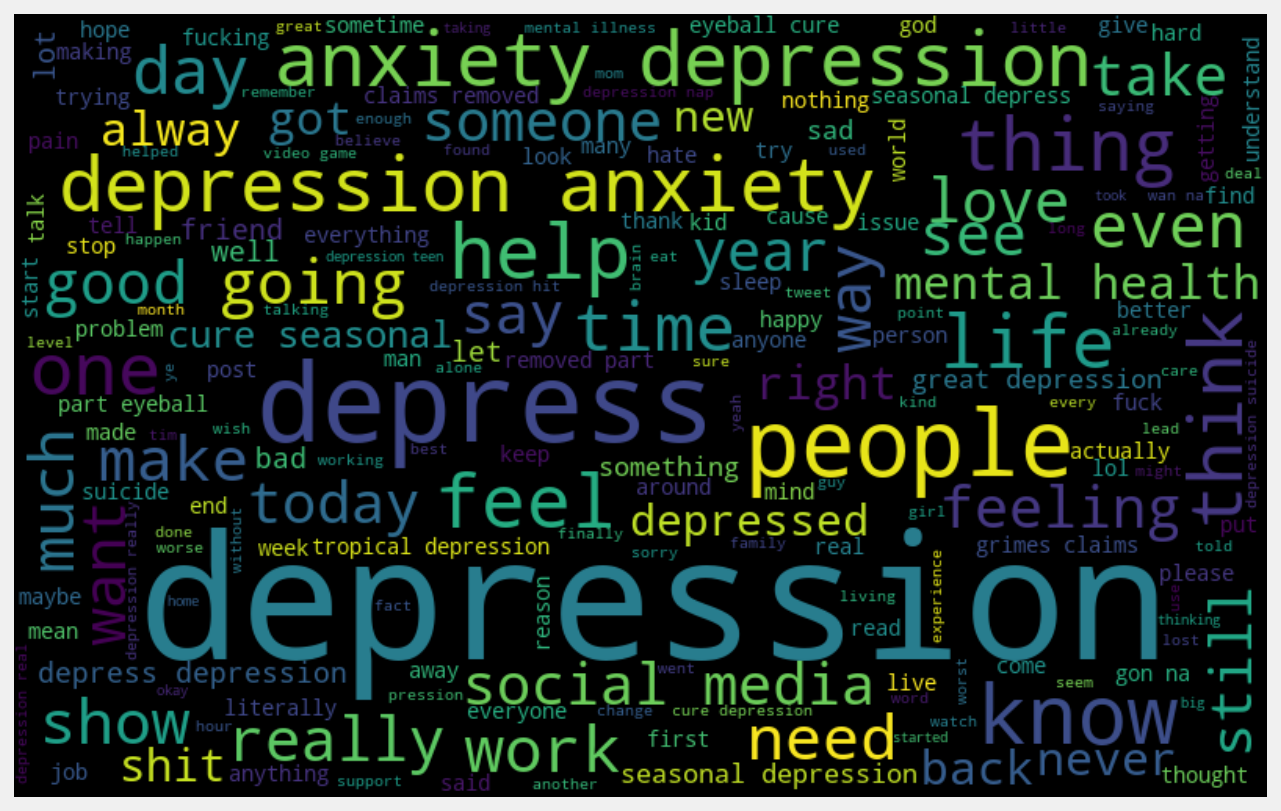

In [72]:
all_words = ' '.join([text for text in X_d])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

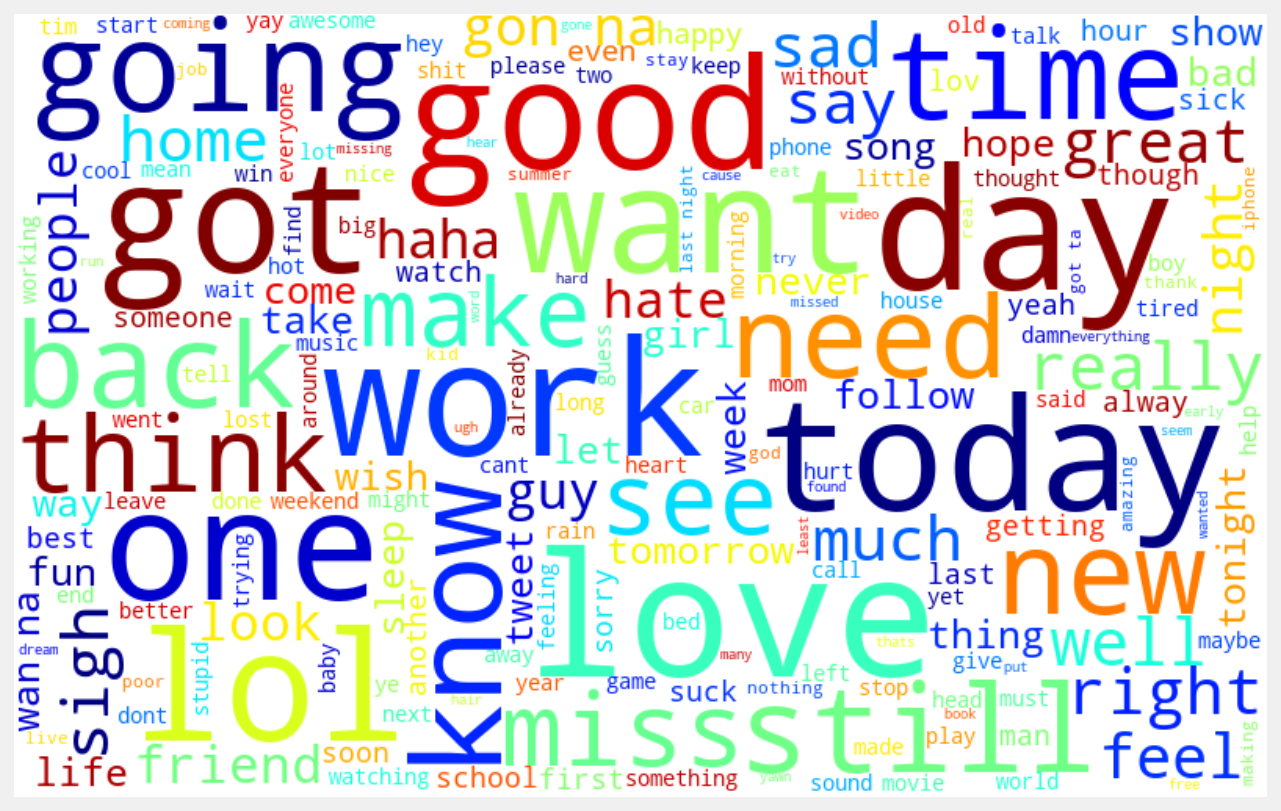

In [73]:
all_words = ' '.join([text for text in X_r])
wordcloud = WordCloud(background_color='white', colormap='jet', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [74]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(X_d + X_r)

In [75]:
sequences_d = tokenizer.texts_to_sequences(X_d)
sequences_r = tokenizer.texts_to_sequences(X_r)

In [76]:
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 42766 unique tokens


In [77]:
data_d = pad_sequences(sequences_d, maxlen=MAX_SEQUENCE_LENGTH)
data_r = pad_sequences(sequences_r, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data_d tensor:', data_d.shape)
print('Shape of data_r tensor:', data_r.shape)

Shape of data_d tensor: (24725, 280)
Shape of data_r tensor: (19898, 280)


In [78]:
embeddings_index = {}
f = open(EMBEDDING_FILE)



for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 1193514 word vectors.


In [79]:
nb_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for (word, idx) in word_index.items():
    if word in embeddings_index and idx < MAX_NB_WORDS:
      embedding_matrix[idx]=embeddings_index[word]

In [80]:
# Assigning labels to the depressive tweets and random tweets data
labels_d = np.array([1] * DEPRES_NROWS)
labels_r = np.array([0] * RANDOM_NROWS)

# Splitting the arrays into training (60%), validation (20%), and testing data (20%)
perm_d = np.random.permutation(len(data_d))
idx_train_d = perm_d[:int(len(data_d)*(TRAIN_SPLIT))]
idx_test_d = perm_d[int(len(data_d)*(TRAIN_SPLIT)):int(len(data_d)*(TRAIN_SPLIT+TEST_SPLIT))]
idx_val_d = perm_d[int(len(data_d)*(TRAIN_SPLIT+TEST_SPLIT)):]

perm_r = np.random.permutation(len(data_r))
idx_train_r = perm_r[:int(len(data_r)*(TRAIN_SPLIT))]
idx_test_r = perm_r[int(len(data_r)*(TRAIN_SPLIT)):int(len(data_r)*(TRAIN_SPLIT+TEST_SPLIT))]
idx_val_r = perm_r[int(len(data_r)*(TRAIN_SPLIT+TEST_SPLIT)):]

# Combine depressive tweets and random tweets arrays
data_train = np.concatenate((data_d[idx_train_d], data_r[idx_train_r]))
labels_train = np.concatenate((labels_d[idx_train_d], labels_r[idx_train_r]))
data_test = np.concatenate((data_d[idx_test_d], data_r[idx_test_r]))
labels_test = np.concatenate((labels_d[idx_test_d], labels_r[idx_test_r]))
data_val = np.concatenate((data_d[idx_val_d], data_r[idx_val_r]))
labels_val = np.concatenate((labels_d[idx_val_d], labels_r[idx_val_r]))

# Shuffling
perm_train = np.random.permutation(len(data_train))
data_train = data_train[perm_train]
labels_train = labels_train[perm_train]
perm_test = np.random.permutation(len(data_test))
data_test = data_test[perm_test]
labels_test = labels_test[perm_test]
perm_val = np.random.permutation(len(data_val))
data_val = data_val[perm_val]
labels_val = labels_val[perm_val]

In [81]:
model = Sequential()
# Embedded layer
model.add(Embedding(len(embedding_matrix), EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False))
# Convolutional Layer
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
# LSTM Layer
model.add(LSTM(300))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
nadam = optimizers.Nadam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

In [82]:
model.compile(loss='binary_crossentropy', optimizer=nadam, metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 280, 200)          5000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 280, 32)           19232     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 140, 32)           0         
_________________________________________________________________
dropout (Dropout)            (None, 140, 32)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 300)               399600    
_________________________________________________________________
dropout_1 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3

In [83]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

hist = model.fit(data_train, labels_train, \
        validation_data=(data_val, labels_val), \
        epochs=EPOCHS, batch_size=16, shuffle=True, \
        callbacks=[early_stop])

Epoch 1/20


2021-05-01 13:35:03,847 : ERROR : Internal Python error in the inspect module.
Below is the traceback from this internal error.

2021-05-01 13:35:03,870 : INFO : 
Unfortunately, your original traceback can not be constructed.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-83-aafa8b60b8a4>", line 3, in <module>
    hist = model.fit(data_train, labels_train,         validation_data=(data_val, labels_val),         epochs=EPOCHS, batch_size=16, shuffle=True,         callbacks=[early_stop])
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py", line 1100, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 828, in __call__
    result = self._call(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/def_function.py", line 888, in _call
    return self._stateless_fn(*args, **kwds)
  File "/usr/local/lib/python3.7/dist-packages/tensorflow/python/eager/function.py", line 2943, in __call__

KeyboardInterrupt: ignored

In [ ]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylim(.92,1)
plt.show()

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((0,.2))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
labels_pred = model.predict(data_test)
labels_pred = np.round(labels_pred.flatten())
accuracy = accuracy_score(labels_test, labels_pred)
print("Accuracy: %.2f%%" % (accuracy*100))

In [ ]:
print(classification_report(labels_test, labels_pred))

In [ ]:
print('\n# Evaluate')
model.evaluate(data_test, labels_test)

In [ ]:
import h5py
json_file = model.to_json()
with open('/content/model.json', "w") as file:
   file.write(json_file)
# serialize weights to HDF5
model.save_weights('model_weights.h5')

In [ ]:
model.save('model.h5')

In [ ]:
print(data_test[0])

In [ ]:
labels_pred

In [ ]:
data_test.shape

In [84]:
from keras.models import load_model
model=load_model('/content/model.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 280, 200)          5000000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 280, 32)           19232     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 140, 32)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 140, 32)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 300)               399600    
_________________________________________________________________
dropout_3 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [85]:
model.predict(data_test[0])

2021-05-01 13:40:10,452 : WARNING : Model was constructed with shape (None, 280) for input KerasTensor(type_spec=TensorSpec(shape=(None, 280), dtype=tf.float32, name='embedding_2_input'), name='embedding_2_input', description="created by layer 'embedding_2_input'"), but it was called on an input with incompatible shape (None, 1).


ValueError: ignored

In [86]:
t=data_test[0]
t=t.reshape(1,280)

In [87]:
t.shape

(1, 280)

In [88]:
model.predict(t)

array([[0.9999428]], dtype=float32)

In [89]:
user=np.array((0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 1, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16))

In [90]:
user.shape

(280,)

In [91]:
user=user.reshape(1,280)

In [92]:
print(model.predict(user))

[[0.99998665]]


In [118]:
text=['Do not allow some idiots to depress you and grieve your beautiful eyes. I love you always and forever.KIM TAEHYUNG WE LOVE YOU #EnjoyKloudWithV #TAEHYUNGBESTBOY']
print(text)
text=clean_tweets(text)
print(text)

['Do not allow some idiots to depress you and grieve your beautiful eyes. I love you always and forever.KIM TAEHYUNG WE LOVE YOU #EnjoyKloudWithV #TAEHYUNGBESTBOY']
['allow idiots depress grieve beautiful eyes love always forever kim taehyung lov']


AttributeError: ignored